Rede SOM que aprende as cores usando a biblioteca minisom

In [140]:
import sys
sys.path.insert(0, '../')
# Instalando a MiniSOM
!pip install minisom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [227]:
# le a img
img = plt.imread('hqdefault.jpg')

In [229]:
# reshaping com 3 Cchanels colors
print(img.shape[0])
print(img.shape[1])
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))


360
480


In [283]:
# SOM init and train
from minisom import MiniSom
print('training...')
som = MiniSom(3, 3, 3, sigma=1,learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 10)
print('finished!!!')


training...
finished!!!


In [284]:
print('quantization...')
qnt = som.quantization(pixels)  # quantize cada pixels da img
clustered = np.zeros(img.shape) # matriz de zeros

for i, q in enumerate(qnt):
    # joga o valor quantization na nova imagem
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done!!!')

quantization...


/usr/local/lib/python3.7/dist-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  import sys


done!!!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


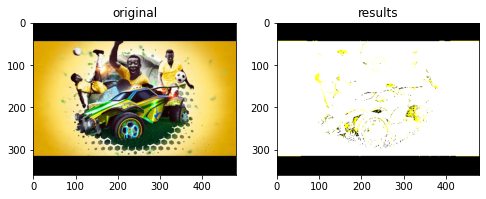

In [282]:
# resultado
plt.figure(figsize=(8, 8))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('results')
plt.imshow(clustered)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


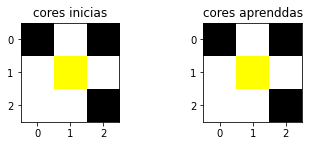

In [281]:
plt.subplot(223)
plt.title('cores inicias')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('cores aprenddas')
plt.imshow(som.get_weights(), interpolation='none')

In [139]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>